In [ ]:
# Priyal
# Dataset -CM1
# Model -Gan
# Train for balancing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**

In [ ]:
import pandas as pd

# Load cm1 dataset
cm1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/cm1.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(cm1_data.head())


First few rows of the dataset:
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2  

In [ ]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(cm1_data.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  

In [ ]:
# Summary statistics of numerical attributes
print("\nSummary statistics of numerical attributes:")
print(cm1_data.describe())



Summary statistics of numerical attributes:
              loc        v(g)       ev(g)       iv(g)            n  \
count  498.000000  498.000000  498.000000  498.000000   498.000000   
mean    29.644779    5.382329    2.490763    3.528916   143.956426   
std     42.753572    8.347359    3.658847    5.464398   221.049888   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      8.000000    1.000000    1.000000    1.000000    25.000000   
50%     17.000000    3.000000    1.000000    2.000000    67.500000   
75%     31.000000    6.000000    1.000000    4.000000   151.750000   
max    423.000000   96.000000   30.000000   63.000000  2075.000000   

                  v           l           d           i             e  ...  \
count    498.000000  498.000000  498.000000  498.000000  4.980000e+02  ...   
mean     900.175823    0.146325   15.829378   38.455361  3.488493e+04  ...   
std     1690.814334    0.159337   15.330960   36.996297  1.341647e+05  ...   
min        0

In [ ]:
# Class distribution
print("\nClass distribution:")
print(cm1_data['defects'].value_counts())



Class distribution:
False    449
True      49
Name: defects, dtype: int64


In [ ]:
# Missing values
print("\nMissing values:")
print(cm1_data.isnull().sum())


Missing values:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


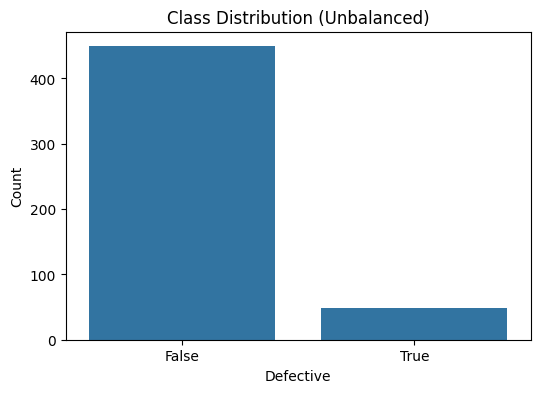

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=cm1_data, x='defects')
plt.title('Class Distribution (Unbalanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()




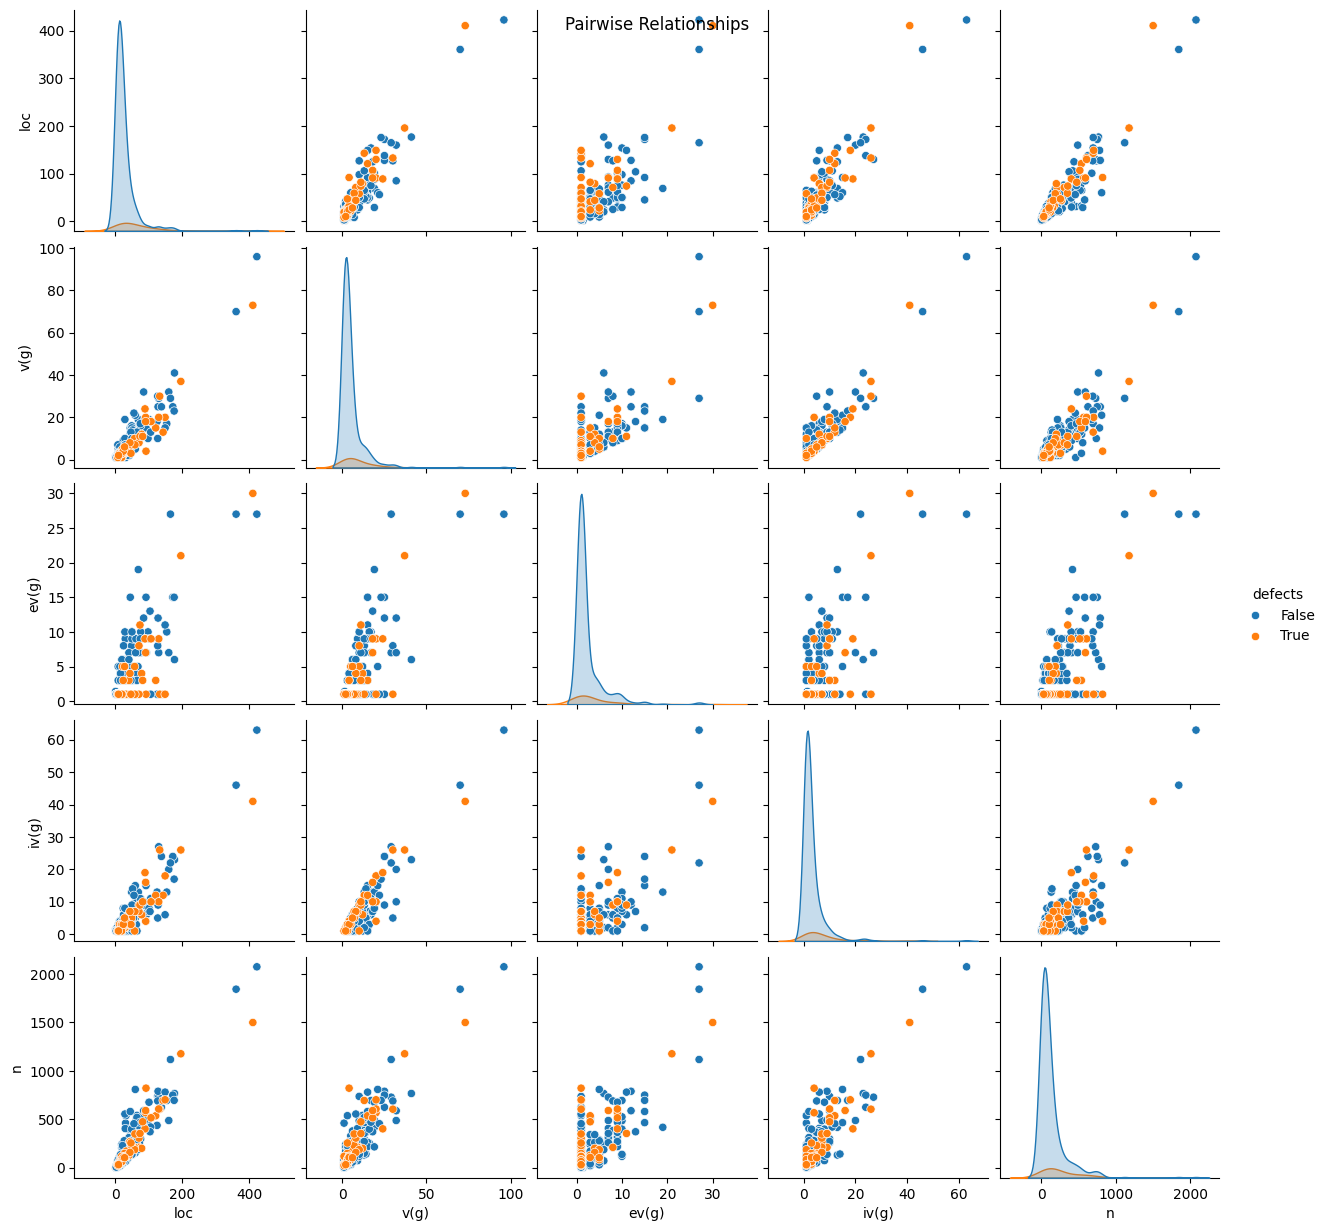

In [ ]:
# Pairwise Relationships
sns.pairplot(cm1_data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'defects']], hue='defects')
plt.suptitle('Pairwise Relationships')
plt.show()



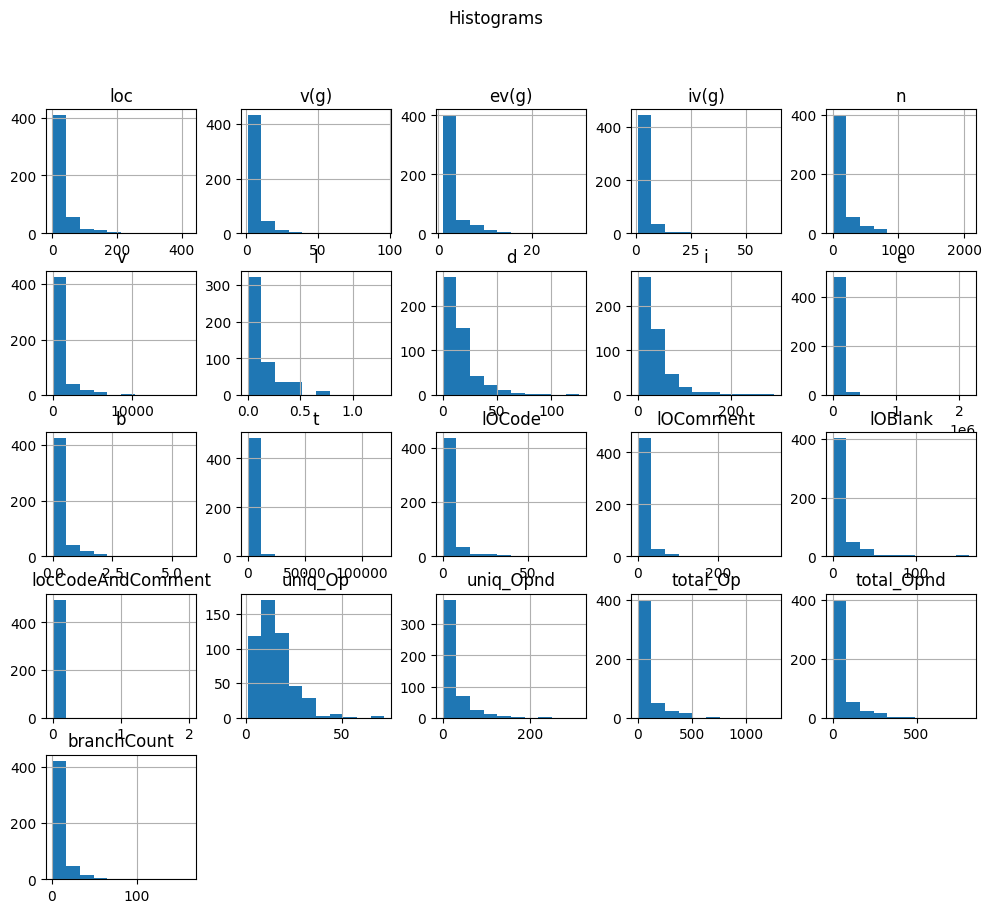

In [ ]:
# Histograms
cm1_data.hist(figsize=(12, 10))
plt.suptitle('Histograms')
plt.show()


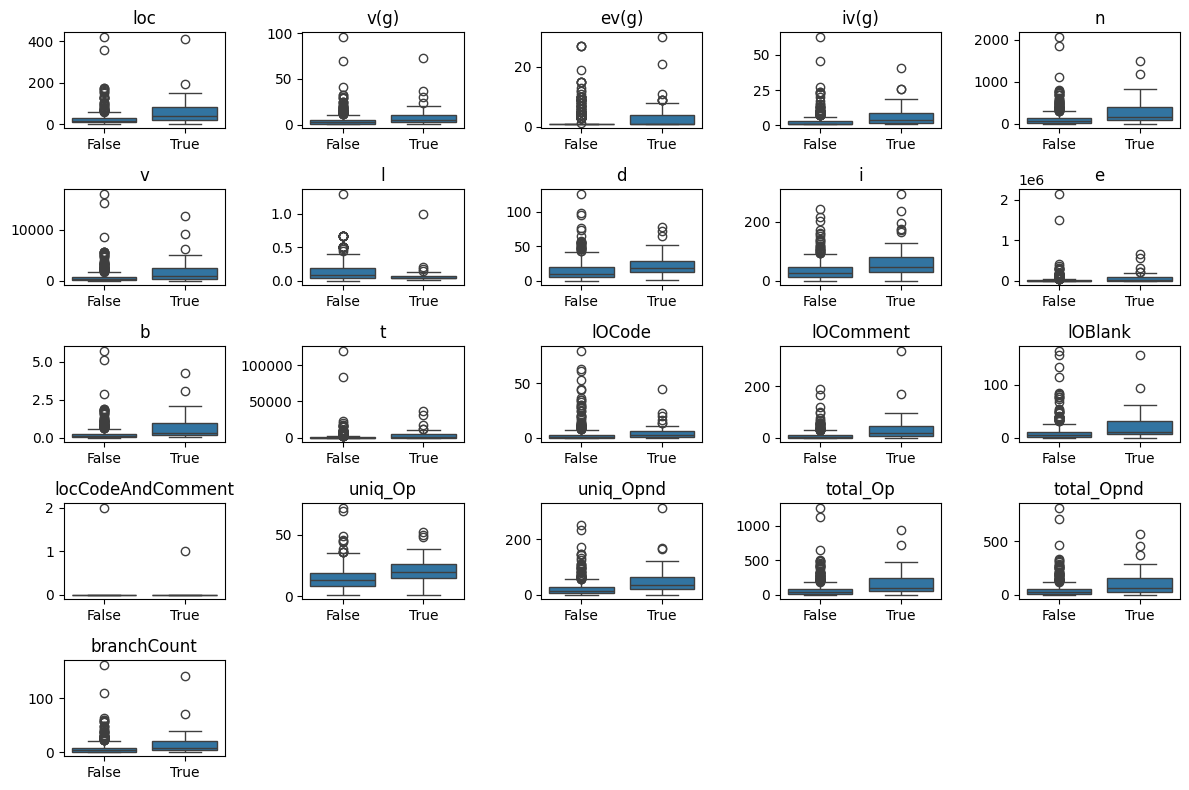

In [ ]:
# Visualize box plots for all attributes
plt.figure(figsize=(12, 8))
for i, column in enumerate(cm1_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='defects', y=column, data=cm1_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **Data Balancing**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models
from sklearn.utils import shuffle

# Load cm1 dataset
cm1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/cm1.csv")

# Preprocess data
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Define GAN architecture
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(output_dim, activation='sigmoid'))
    return model

def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Define GAN parameters
latent_dim = 100
output_dim = X.shape[1]
epochs = 10
batch_size = 32

# Build and compile the GAN
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)
gan = build_gan(generator, discriminator)

# Train GAN
for epoch in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        synthetic_data = generator.predict(noise)
        X_combined = np.concatenate([X.values, synthetic_data])
        y_combined = np.concatenate([y, np.ones((synthetic_data.shape[0],))]).astype('float32')  # Convert to float32
        X_combined, y_combined = shuffle(X_combined, y_combined)  # Shuffle combined data
        discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gen = np.ones((batch_size,)).astype('float32')  # Convert to float32
        generator_loss = gan.train_on_batch(noise, y_gen)

    print(f"Epoch: {epoch}, D Loss: {discriminator_loss}, G Loss: {generator_loss}")

# Generate synthetic defect data
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise)
    return synthetic_data

# Adjust num_samples to balance the data according to the minority class
synthetic_data = generate_synthetic_data(generator, num_samples=400)  # Generate synthetic data to match the majority class size

# Combine synthetic data with original data
combined_data = np.concatenate([X.values, synthetic_data])

# Reshape y to match the shape of the synthetic data
y_reshaped = y.values.reshape(-1, 1)

# Concatenate reshaped y with an array of ones
combined_target = np.concatenate([y_reshaped, np.ones((synthetic_data.shape[0], 1))]).astype('float32')

# Save balanced dataset to a new file
balanced_cm1 = pd.DataFrame(data=combined_data, columns=X.columns)
balanced_cm1['defects'] = combined_target
balanced_cm1.to_csv("balanced_cm1.csv", index=False)


1/1 [==============================] - 0s 18ms/step
Epoch: 0, D Loss: [40.653507232666016, 0.9075471758842468], G Loss: 0.3023186922073364
1/1 [==============================] - 0s 18ms/step
Epoch: 1, D Loss: [16.93318748474121, 0.5283018946647644], G Loss: 0.11248324811458588
1/1 [==============================] - 0s 18ms/step
Epoch: 2, D Loss: [3.371901750564575, 0.8754717111587524], G Loss: 0.04916084557771683
1/1 [==============================] - 0s 35ms/step
Epoch: 3, D Loss: [6.18116569519043, 0.9075471758842468], G Loss: 0.026435811072587967
1/1 [==============================] - 0s 18ms/step
Epoch: 4, D Loss: [40.974945068359375, 0.9094339609146118], G Loss: 0.013830047100782394
1/1 [==============================] - 0s 19ms/step
Epoch: 5, D Loss: [16.230274200439453, 0.9094339609146118], G Loss: 0.0077145714312791824
1/1 [==============================] - 0s 20ms/step
Epoch: 6, D Loss: [37.14515686035156, 0.9094339609146118], G Loss: 0.0048823547549545765
1/1 [===============

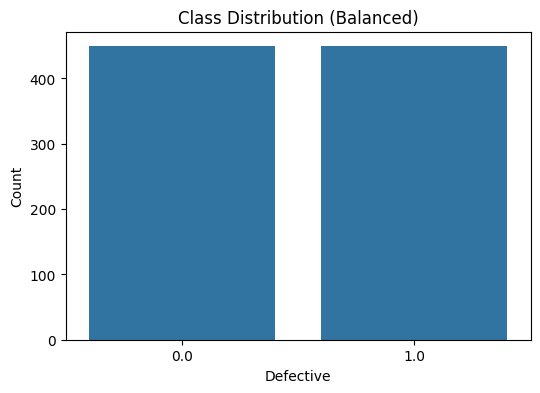

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new balanced dataset
balanced_cm1_data = pd.read_csv("balanced_cm1.csv")

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_cm1_data, x='defects')
plt.title('Class Distribution (Balanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()


# **Random Forest Classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# Load the balanced dataset generated using GAN
balanced_cm1_gan = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_gan = balanced_cm1_gan.drop(columns=["defects"])
y_gan = balanced_cm1_gan["defects"]

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Train RandomForestClassifier on the balanced dataset generated using GAN
rf_classifier_gan = RandomForestClassifier(random_state=42)
rf_classifier_gan.fit(X_train_gan, y_train_gan)

# Predict on the test set
y_pred_gan = rf_classifier_gan.predict(X_test_gan)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_gan, y_pred_gan)
print("Random Forest Accuracy using GAN:", accuracy_rf)

# Calculate precision
precision_rf = precision_score(y_test_gan, y_pred_gan)
print("Random Forest Precision using GAN:", precision_rf)

# Calculate recall
recall_rf = recall_score(y_test_gan, y_pred_gan)
print("Random Forest Recall using GAN:", recall_rf)

# Generate classification report
report_gan = classification_report(y_test_gan, y_pred_gan)

# Print classification report
print("Classification Report for Random Forest using GAN:")
print(report_gan)


Random Forest Accuracy using GAN: 0.95
Random Forest Precision using GAN: 1.0
Random Forest Recall using GAN: 0.8928571428571429
Classification Report for Random Forest using GAN:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        96
         1.0       1.00      0.89      0.94        84

    accuracy                           0.95       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180



# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Accuracy using GAN balanced file: 0.5022271714922049
K-means Precision : 0.5011160714285714
K-means Recall : 1.0


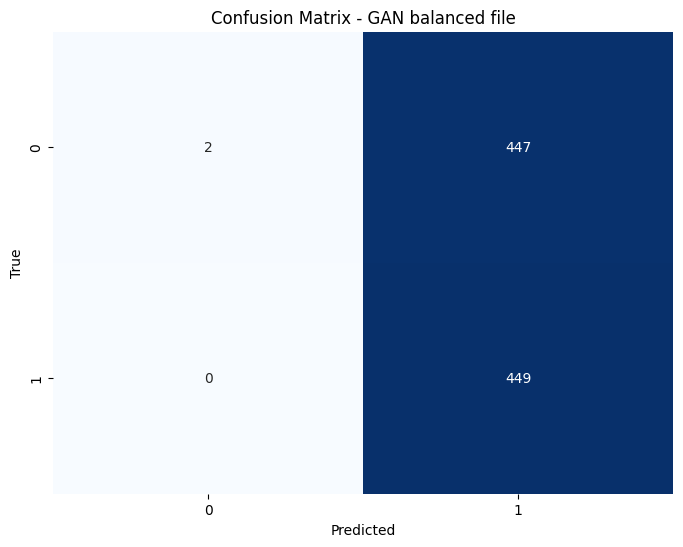

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       449
         1.0       0.50      1.00      0.67       449

    accuracy                           0.50       898
   macro avg       0.75      0.50      0.34       898
weighted avg       0.75      0.50      0.34       898



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load GAN balanced dataset
balanced_cm1_gan = pd.read_csv("balanced_cm1.csv")

# Separate features and target variable
X_gan = balanced_cm1_gan.drop(columns=["defects"])
y_gan = balanced_cm1_gan["defects"]

# Train KMeans model
kmeans_gan = KMeans(n_clusters=2, random_state=42)
kmeans_gan.fit(X_gan)

# Predict clusters
y_pred_gan = kmeans_gan.labels_

# Calculate accuracy
accuracy_kmeans = accuracy_score(y_gan, y_pred_gan)
print("K-means Accuracy using GAN balanced file:", accuracy_kmeans)

# Calculate precision and recall
precision_kmeans = precision_score(y_gan, y_pred_gan)
recall_kmeans = recall_score(y_gan, y_pred_gan)

# Print precision and recall for each class
print("K-means Precision :", precision_kmeans)
print("K-means Recall :", recall_kmeans)

# Create confusion matrix
cm_gan = confusion_matrix(y_gan, y_pred_gan)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gan, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GAN balanced file")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_gan, y_pred_gan))


# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the GAN balanced dataset
balanced_cm1_gan = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_gan = balanced_cm1_gan.drop(columns=["defects"])
y_gan = balanced_cm1_gan["defects"]

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Train SVM on the GAN balanced dataset
svm_gan = SVC(kernel='linear')
svm_gan.fit(X_train_gan, y_train_gan)

# Predict on the test set
y_pred_gan = svm_gan.predict(X_test_gan)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_gan, y_pred_gan)
print("SVM Accuracy using GAN:", accuracy_svm)

# Calculate precision
precision_svm = precision_score(y_test_gan, y_pred_gan)
print("SVM Precision using GAN:", precision_svm)

# Calculate recall
recall_svm = recall_score(y_test_gan, y_pred_gan)
print("SVM Recall using GAN:", recall_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_gan, y_pred_gan))


SVM Accuracy using GAN: 0.8888888888888888
SVM Precision using GAN: 0.8902439024390244
SVM Recall using GAN: 0.8690476190476191
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        96
         1.0       0.89      0.87      0.88        84

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



# **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the GAN balanced dataset
balanced_cm1_gan = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_gan = balanced_cm1_gan.drop(columns=["defects"])
y_gan = balanced_cm1_gan["defects"]

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Train Logistic Regression on the GAN balanced dataset
lr_gan = LogisticRegression(random_state=42)
lr_gan.fit(X_train_gan, y_train_gan)

# Predict on the test set
y_pred_gan = lr_gan.predict(X_test_gan)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_gan, y_pred_gan)
print("Logistic Regression Accuracy using GAN:", accuracy_lr)

# Calculate precision
precision_lr = precision_score(y_test_gan, y_pred_gan)
print("Logistic Regression Precision using GAN:", precision_lr)

# Calculate recall
recall_lr = recall_score(y_test_gan, y_pred_gan)
print("Logistic Regression Recall using GAN:", recall_lr)

# Generate classification report
classification_report_gan = classification_report(y_test_gan, y_pred_gan)
print("Classification Report using GAN:")
print(classification_report_gan)


Logistic Regression Accuracy using GAN: 0.9166666666666666
Logistic Regression Precision using GAN: 0.8876404494382022
Logistic Regression Recall using GAN: 0.9404761904761905
Classification Report using GAN:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92        96
         1.0       0.89      0.94      0.91        84

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Decision Trees**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the GAN balanced dataset
balanced_cm1_gan = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_gan = balanced_cm1_gan.drop(columns=["defects"])
y_gan = balanced_cm1_gan["defects"]

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Train Decision Tree on the GAN balanced dataset
dt_gan = DecisionTreeClassifier(random_state=42)
dt_gan.fit(X_train_gan, y_train_gan)

# Predict on the test set
y_pred_gan = dt_gan.predict(X_test_gan)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_gan, y_pred_gan)
print("Decision Trees Accuracy using GAN:", accuracy_dt)

# Calculate precision
precision_dt = precision_score(y_test_gan, y_pred_gan)
print("Decision Trees Precision using GAN:", precision_dt)

# Calculate recall
recall_dt = recall_score(y_test_gan, y_pred_gan)
print("Decision Trees Recall using GAN:", recall_dt)

# Generate classification report
report_gan = classification_report(y_test_gan, y_pred_gan)
print("Classification Report using GAN:\n", report_gan)


Decision Trees Accuracy using GAN: 0.9055555555555556
Decision Trees Precision using GAN: 0.9036144578313253
Decision Trees Recall using GAN: 0.8928571428571429
Classification Report using GAN:
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91        96
         1.0       0.90      0.89      0.90        84

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.91       180
weighted avg       0.91      0.91      0.91       180



# **Gradient Boosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the GAN balanced dataset
balanced_cm1_gan = pd.read_csv("balanced_cm1.csv")

# Split the data into features and target variable
X_gan = balanced_cm1_gan.drop(columns=["defects"])
y_gan = balanced_cm1_gan["defects"]

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Train Gradient Boosting on the GAN balanced dataset
gb_gan = GradientBoostingClassifier(random_state=42)
gb_gan.fit(X_train_gan, y_train_gan)

# Predict on the test set
y_pred_gan = gb_gan.predict(X_test_gan)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_gan, y_pred_gan)
print("Gradient Boosting Accuracy using GAN:", accuracy_gb)

# Calculate precision and recall
precision_gb = precision_score(y_test_gan, y_pred_gan)
recall_gb = recall_score(y_test_gan, y_pred_gan)

print("Precision using GAN:", precision_gb)
print("Recall using GAN:", recall_gb)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_gan, y_pred_gan))


Gradient Boosting Accuracy using GAN: 0.9388888888888889
Precision using GAN: 0.9620253164556962
Recall using GAN: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        96
         1.0       0.96      0.90      0.93        84

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



# **Comparison Between models**

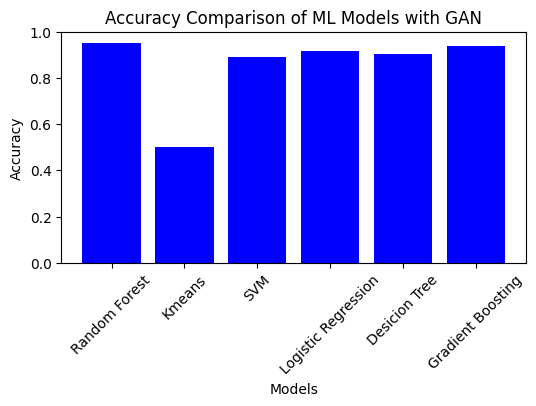

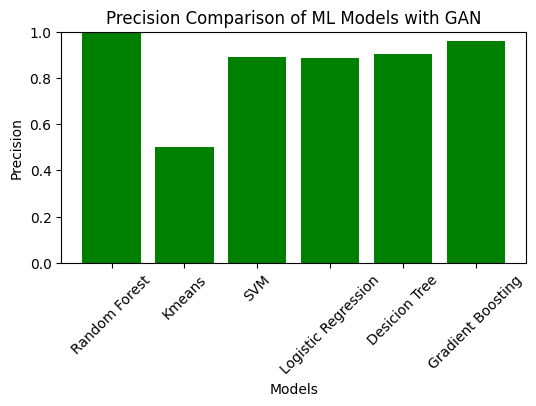

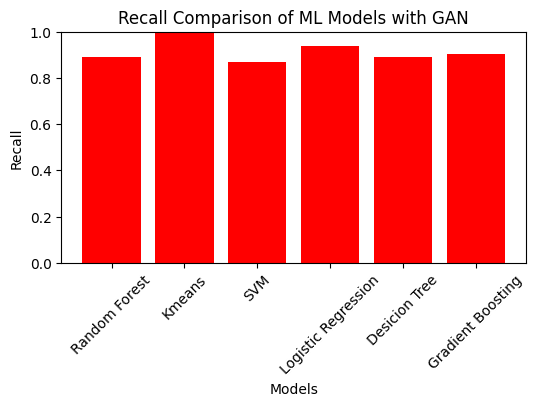

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy Comparison of ML Models with GAN')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='green')
plt.title('Precision Comparison of ML Models with GAN')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting recall
plt.figure(figsize=(6, 3))
plt.bar(models, recalls, color='red')
plt.title('Recall Comparison of ML Models with GAN')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

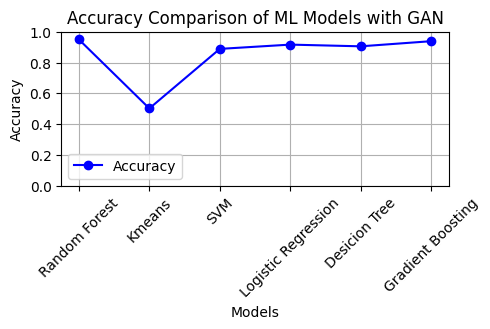

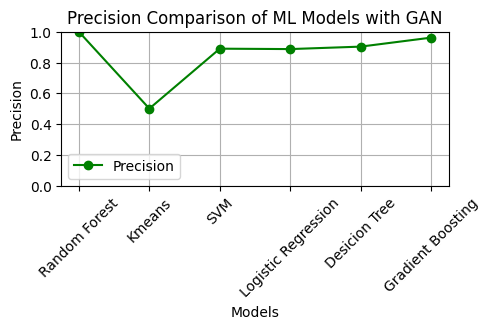

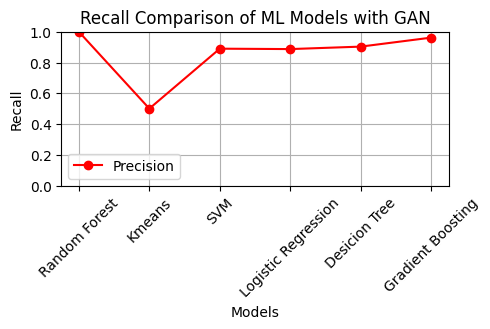

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models with GAN')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models with GAN')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting recall
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='red', label='Precision')
plt.title('Recall Comparison of ML Models with GAN')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()